In [ ]:
library(monocle3)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)

In [43]:
example_expression_matrix <- readRDS(url("http://staff.washington.edu/hpliner/data/packer_embryo_expression.rds"))
example_cell_metadata <- readRDS(url("http://staff.washington.edu/hpliner/data/packer_embryo_colData.rds"))
example_gene_annotation <- readRDS(url("http://staff.washington.edu/hpliner/data/packer_embryo_rowData.rds"))

In [ ]:
example_gene_annotation

In [ ]:
# install.packages("devtools")
# devtools::install_github('cole-trapnell-lab/leidenbase')
# devtools::install_github('cole-trapnell-lab/monocle3')

In [81]:
expression_matrix <- read.csv('example/small_HSC/chromvar_pseudotime/score.txt', sep='\t', row.names = 1)
# expression_matrix <- t(expression_matrix)
# rownames(expression_matrix) <- gsub('\\.', '-', rownames(expression_matrix))
# expression_matrix <- expression_matrix[rownames(cell_metadata),]

length(colnames(expression_matrix))

cell_metadata <- read.csv('example/small_HSC/chromvar_pseudotime/meta_data.txt', sep='\t', row.names = 1)

gene_annotation <- read.csv('example/small_HSC/chromvar_pseudotime/feature.txt', sep='\t', row.names = 1, header = FALSE)
gene_annotation['gene_short_name'] = rownames(gene_annotation)

In [158]:
expression_matrix <- read.csv('example/small_HSC/script_pseudotime/score.txt', sep='\t', row.names = 1)
expression_matrix <- t(expression_matrix)
rownames(expression_matrix) <- gsub('\\.', '-', rownames(expression_matrix))


cell_metadata <- read.csv('example/small_HSC/script_pseudotime/meta_data.txt', sep='\t', row.names = 1)
# expression_matrix <- expression_matrix[rownames(cell_metadata),]

gene_annotation <- read.csv('example/small_HSC/script_pseudotime/feature.txt', sep='\t', row.names = 1, header = FALSE)
gene_annotation['gene_short_name'] = rownames(gene_annotation)

In [165]:
which(rownames(as.matrix(expression_matrix)) != rownames(gene_annotation))

[1] 701

In [166]:
rownames(as.matrix(expression_matrix))[701]

[1] "TEAD1-"

In [167]:
rownames(gene_annotation)[701]

[1] "TEAD1,"

In [168]:
cds <- new_cell_data_set(as.matrix(expression_matrix),
                         cell_metadata = cell_metadata,
                         gene_metadata = NULL)

Warning message in new_cell_data_set(as.matrix(expression_matrix), cell_metadata = cell_metadata, :
"Warning: gene_metadata must contain a column verbatim named 'gene_short_name' for certain functions."
Warning message in log(cell_total):
"NaNs produced"


In [174]:
cds <- preprocess_cds(cds, num_dim = 50)

Warning message in normalize_expr_data(cds, norm_method, pseudo_count):
"NaNs produced"
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"did not converge--results might be invalid!; try increasing work or maxit"


In [177]:
cds <- reduce_dimension(cds, reduction_method="tSNE")

No preprocess_method specified, using preprocess_method = 'PCA'



No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



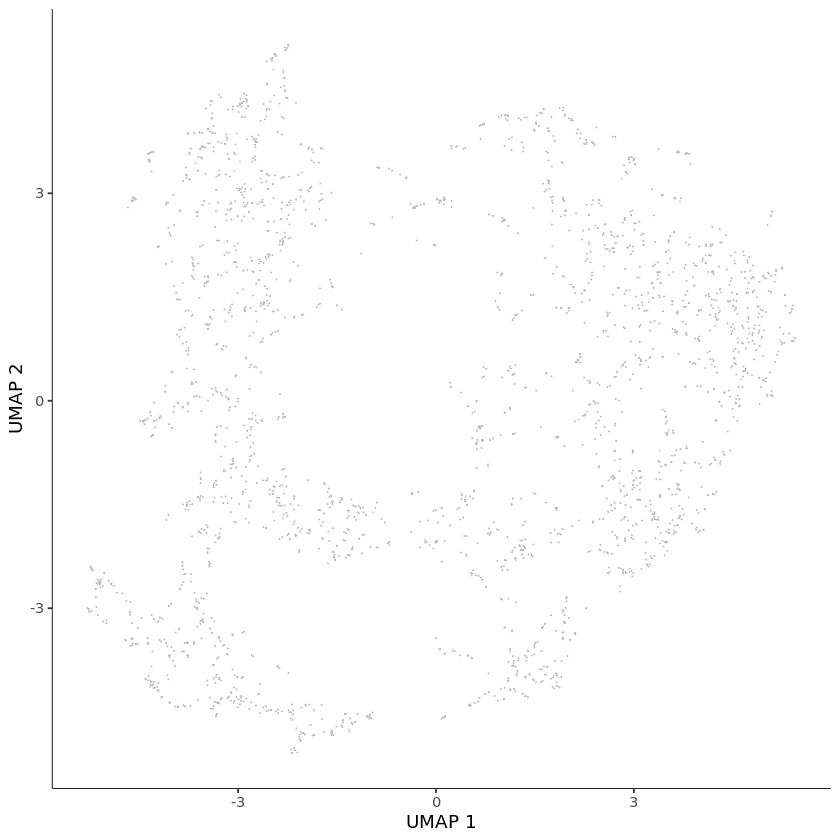

In [178]:
plot_cells(cds)

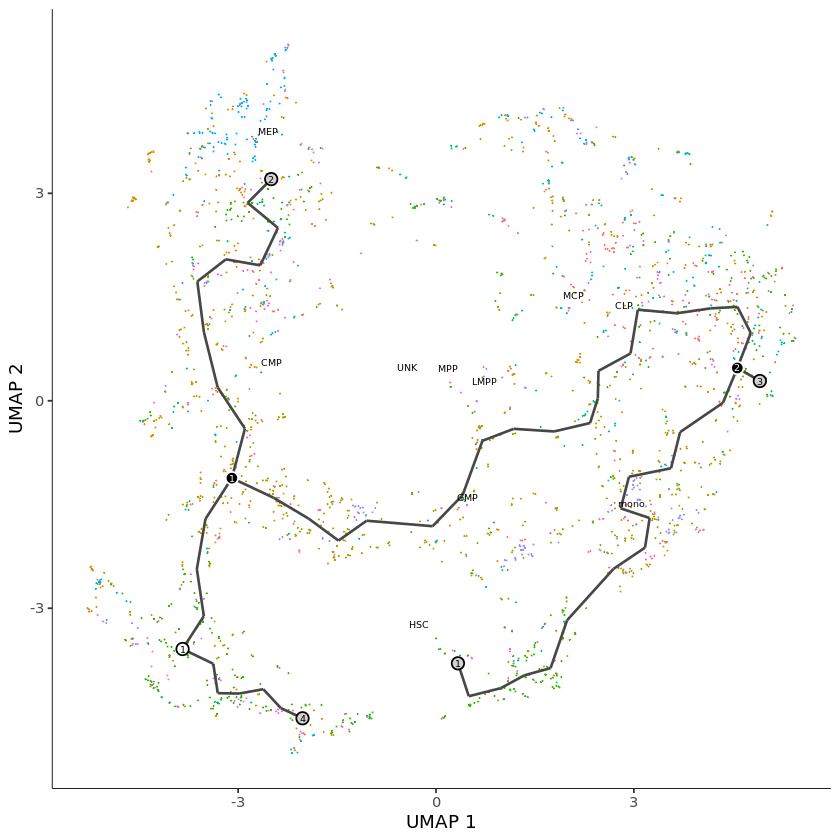

In [120]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "assign.celltype")

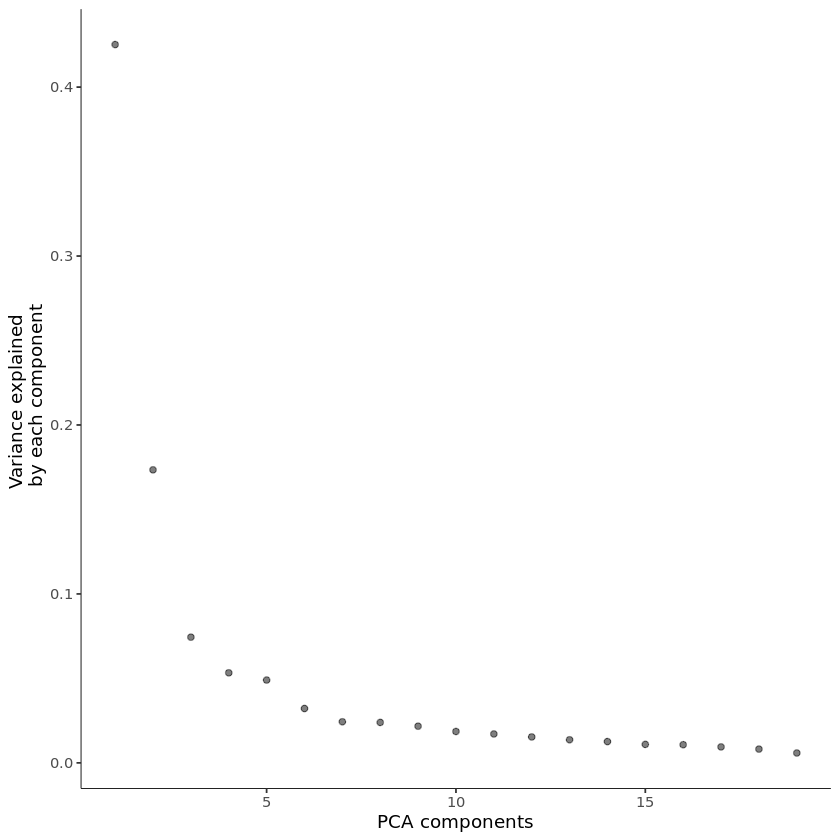

In [121]:
plot_pc_variance_explained(cds)

In [115]:
## Step 1: Normalize and pre-process the data
cds <- preprocess_cds(cds, num_dim = 50)
# cds <- align_cds(cds, alignment_group = "batch", residual_model_formula_str = "~ bg.300.loading + bg.400.loading + bg.500.1.loading + bg.500.2.loading + bg.r17.loading + bg.b01.loading + bg.b02.loading")
## Step 3: Reduce the dimensions using UMAP
cds <- reduce_dimension(cds, preprocess_method="PCA")
## Step 4: Cluster the cells
cds <- cluster_cells(cds)
## Step 5: Learn a graph
cds <- learn_graph(cds)

Warning message in normalize_expr_data(cds, norm_method, pseudo_count):
"NaNs produced"
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"did not converge--results might be invalid!; try increasing work or maxit"


  |======================================================================| 100%


In [116]:
## Step 6: Order cells
get_earliest_principal_node <- function(cds, time_bin="HSC"){
  cell_ids <- which(colData(cds)[, "assign.celltype"] == time_bin)
  
  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
                                                              (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}

In [117]:
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

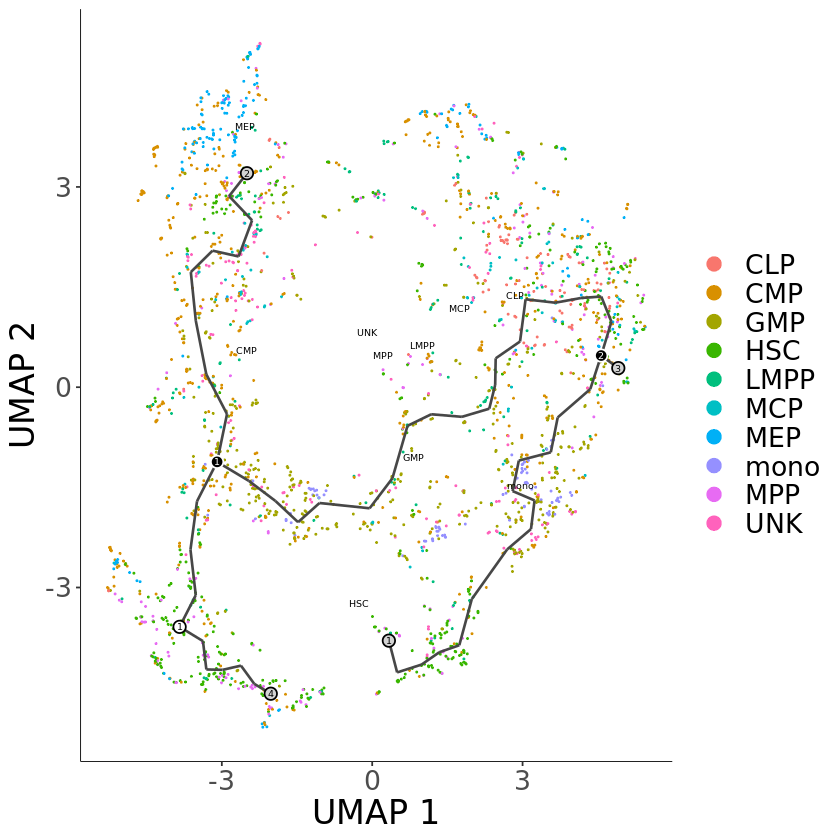

In [118]:
plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "assign.celltype") +
theme(legend.position="right", legend.title = element_blank(), text = element_text(family = 'Arial', face = NULL, colour = NULL, size = 20, hjust = NULL, vjust = NULL, angle = NULL, lineheight = NULL) )

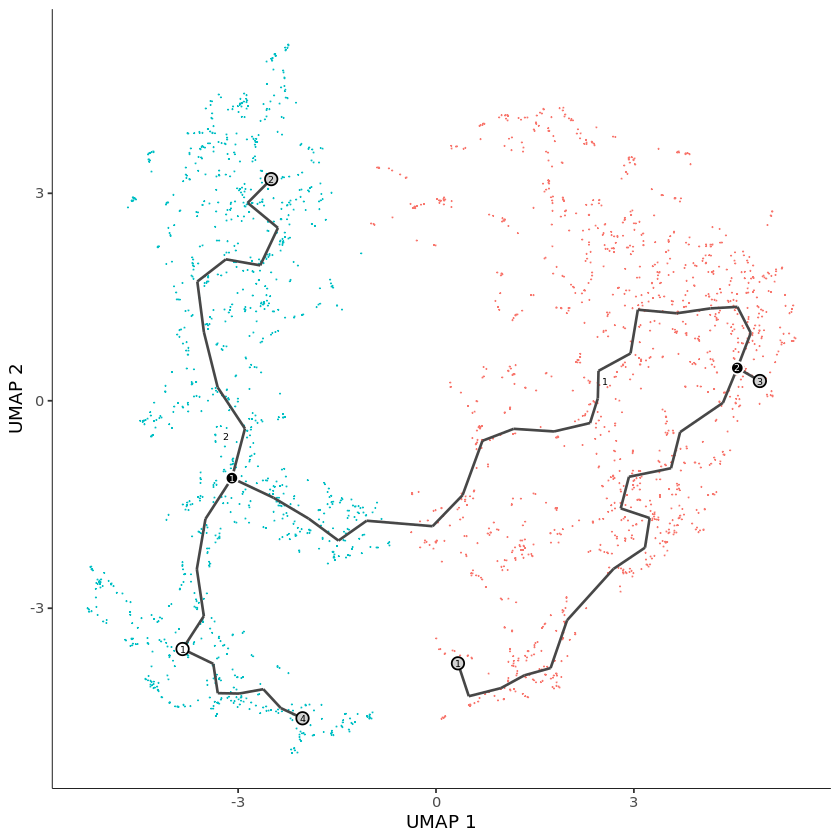

In [11]:
plot_cells(cds, color_cells_by = "cluster")

In [ ]:
?plot_cells

In [ ]:
#infer the differention trajectory lineage by Monocle3
```{r}
library(monocle3)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)
setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK")
TNK_Seurat=readRDS("CCA_TNK_repca_cluster.rds")
which(TNK_Seurat@meta.data$sample =="P08_OSF")
Idents(TNK_Seurat)=as.vector(unlist(Idents(TNK_Seurat)))
names(Idents(TNK_Seurat))=rownames(TNK_Seurat@meta.data)
which(names(Idents(TNK_Seurat)) != rownames(TNK_Seurat@meta.data) )

#CD8T_Seurat=subset(TNK_Seurat,idents=c(2,5,7,8,16,18,20,24,9,10))
index=which(as.vector(unlist(TNK_Seurat@meta.data$seurat_clusters)) %in% c(2,5,7,8,16,18,20,24,9,10))
#CD8T_Seurat=FindVariableFeatures(CD8T_Seurat,mean.cutoff=c(0.125,3),nfeatures=500)
#Idents(TNK_Seurat)[1:5]

#expmat=GetAssayData(CD8T_Seurat)[VariableFeatures(CD8T_Seurat),]
expmat=GetAssayData(TNK_Seurat)
cell_metadata=TNK_Seurat@meta.data[index,]
expmat=expmat[,index]
expmat=as.matrix(expmat)
index=which(rowMeans(expmat) > 0.0125)
expmat=expmat[index,]

gene_metadata=rownames(expmat)
gene_metadata=as.data.frame(gene_metadata)
rownames(gene_metadata)=rownames(expmat)
colnames(gene_metadata)="gene_short_name"

#combined the cytotoxic score and exhuasted score
cytotoxic_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Cytotoxic_score_CD8T.rds")
exhuasted_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Exhuastion_score_CD8T.rds")

#due to the error lable of p08
exhuasted_score$new_sample=exhuasted_score$sample
tumor_index=which(exhuasted_score$sample == "P08_OSF")
osf_index=which(exhuasted_score$sample == "P08_Tumor")
exhuasted_score$new_sample[tumor_index]="P08_Tumor"
exhuasted_score$new_sample[osf_index]="P08_OSF"
exhuasted_score$source=unlist(lapply(strsplit(exhuasted_score$new_sample,"_"),function(x) x[2]))
cell_id=unlist(lapply(strsplit(rownames(exhuasted_score),"@"),function(x) x[2]))
sample_cell=paste(exhuasted_score$new_sample,cell_id,sep = "@")
rownames(exhuasted_score)=sample_cell
rownames(cytotoxic_score)=sample_cell

cell_metadata=data.frame(cell_metadata,Exhuasted_score=as.vector(unlist(exhuasted_score$Exhuastion_HAVCR21)),Cytotoxic_score=as.vector(unlist(cytotoxic_score$Cytotoxic_GZMK1)))
#which(rownames(cell_metadata) != rownames(exhuasted_score))

cell_metadata$cancer_con=cell_metadata$source
cell_metadata$cancer_con[which(cell_metadata$cancer_con %in% c("OLK","OLP","OSF"))]="Precancerous"
colnames(expmat)=rownames(cell_metadata)
cds <- new_cell_data_set(expmat,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_metadata)

## Step 1: Normalize and pre-process the data
cds <- preprocess_cds(cds, num_dim = 100)
## Step 3: Reduce the dimensions using UMAP
cds <- reduce_dimension(cds,preprocess_method="PCA")
## Step 4: Cluster the cells
cds <- cluster_cells(cds)
## Step 5: Learn a graph
cds <- learn_graph(cds)

## Step 6: Order cells
get_earliest_principal_node <- function(cds, time_bin="Naïve CD8 T"){
  cell_ids <- which(colData(cds)[, "curated_anno"] == time_bin)
  
  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
                                                              (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Mean0125")
p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "curated_anno")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cell_type.pdf",p,width = 5,height = 4)



p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "cytotoxic_score$Cytotoxic_GZMK1")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cytotoxic_score.pdf",p,width = 5,height = 4)

p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "exhuasted_score$Exhuastion_HAVCR21")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_exhuasted_score.pdf",p,width = 5,height = 4)


p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "sample",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_sample.pdf",p,width = 5,height = 4)


p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "source",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_source.pdf",p,width = 5,height = 4)

p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "cancer_con",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cancer_con.pdf",p,width = 5,height = 4)

p=plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

saveRDS(cds,file="Monocel3_CD8T_trajectory_object.rds")
```



#infer the differention trajectory lineage by Monocle2
```{r}
library(monocle)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)
setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK")
TNK_Seurat=readRDS("CCA_TNK_repca_cluster.rds")

TNK_Seurat@meta.data$sample[81017,]
which(TNK_Seurat@meta.data$sample =="P08_OSF")


#CD8T_Seurat=subset(TNK_Seurat,idents=c(2,5,7,8,16,18,20,24,9,10))
index=which(as.vector(unlist(TNK_Seurat@meta.data$seurat_clusters)) %in% c(2,5,7,8,16,18,20,24,9,10))

#CD8T_Seurat=FindVariableFeatures(CD8T_Seurat,mean.cutoff=c(0.125,3),nfeatures=500)
#Idents(TNK_Seurat)[1:5]

#expmat=GetAssayData(CD8T_Seurat)[VariableFeatures(CD8T_Seurat),]
#DefaultAssay(TNK_Seurat)<-"RNA"
expmat=GetAssayData(TNK_Seurat)
cell_metadata=TNK_Seurat@meta.data[index,]
expmat=expmat[,index]
#cell_metadata=Myeloid_Seurat@meta.data

expmat=as.matrix(expmat)
index=which(rowMeans(expmat) > 0)
length(index)
expmat=expmat[index,]





gene_metadata=rownames(expmat)
gene_metadata=as.data.frame(gene_metadata)
rownames(gene_metadata)=rownames(expmat)
colnames(gene_metadata)="gene_short_name"

#combined the cytotoxic score and exhuasted score
#cytotoxic_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Cytotoxic_score_CD8T.rds")
#exhuasted_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Exhuastion_score_CD8T.rds")

#due to the error lable of p08
exhuasted_score$new_sample=exhuasted_score$sample
tumor_index=which(exhuasted_score$sample == "P08_OSF")
osf_index=which(exhuasted_score$sample == "P08_Tumor")
exhuasted_score$new_sample[tumor_index]="P08_Tumor"
exhuasted_score$new_sample[osf_index]="P08_OSF"
exhuasted_score$source=unlist(lapply(strsplit(exhuasted_score$new_sample,"_"),function(x) x[2]))
cell_id=unlist(lapply(strsplit(rownames(exhuasted_score),"@"),function(x) x[2]))
sample_cell=paste(exhuasted_score$new_sample,cell_id,sep = "@")
rownames(exhuasted_score)=sample_cell
rownames(cytotoxic_score)=sample_cell

cell_metadata=data.frame(cell_metadata,Exhuasted_score=as.vector(unlist(exhuasted_score$Exhuastion_HAVCR21)),Cytotoxic_score=as.vector(unlist(cytotoxic_score$Cytotoxic_GZMK1)))
#which(rownames(cell_metadata) != rownames(exhuasted_score))

cell_metadata$cancer_con=cell_metadata$source
cell_metadata$cancer_con[which(cell_metadata$cancer_con %in% c("OLK","OLP","OSF"))]="Precancerous"
colnames(expmat)=rownames(cell_metadata)

pd <- new("AnnotatedDataFrame", data = cell_metadata)
fd <- new("AnnotatedDataFrame", data = gene_metadata)

#cds <- newCellDataSet(expmat, phenoData = pd, featureData = fd)
colnames(expmat)=rownames(cell_metadata)

cds <- newCellDataSet(as(expmat, "sparseMatrix"),
                phenoData = pd,
                featureData = fd)



setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/")





#disp_table <- dispersionTable(cds)
#ordering_genes <- subset(disp_table, mean_expression >= 0.05)
cds <- estimateSizeFactors(cds)
cds=estimateDispersions(cds)
cds <- setOrderingFilter(cds, ordering_genes)
cds <- reduceDimension(cds)
saveRDS(cds,file="/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/AssayRNA_more0_monocle.rds")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/AssayRNA_more0_monocle.rds")
cds=ds
cds <- orderCells(cds)
plot_cell_trajectory(cds, color_by = "curated_anno")
#cds <- clusterCells(cds, num_clusters = 3)

#setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle_Mean0125")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle2_relative2abs/CD8T_Monocle2_traject_cds.rds")

p=plot_cell_trajectory(cds, color_by = "curated_anno",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_cell_type.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "curated_anno_gene",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_curated_anno_gene.pdf",p,width = 8,height = 4)

p=plot_cell_trajectory(cds, color_by = "Pseudotime",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "Pseudotime",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "Cytotoxic_score",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_Cytotoxic_score.pdf",p,width = 5,height = 4)
p=plot_cell_trajectory(cds, color_by = "Exhuasted_score",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_Exhuasted_score.pdf",p,width = 5,height = 4)
p=plot_cell_trajectory(cds, color_by = "State",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_State.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "curated_anno",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F) +
    facet_wrap(~curated_anno, nrow = 1)
ggsave("Monocle3_Differention_Traj_CD8T_cell_type_split.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "source",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F) +
    facet_wrap(~source, nrow = 1)
ggsave("Monocle3_Differention_Traj_CD8T_source_split.pdf",p,width = 7,height = 4)

saveRDS(cds,file="Monocel2_CD8T_trajectory_object.rds")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle_Mean0125/Monocel2_CD8T_HVGS2000_trajectory_object.rds")




#数量级不成正比，所以如果
     
index=which(colMeans(expmat[c(match("CD8A",rownames(expmat)),match("CD8B",rownames(expmat))),]) ==0 )
#i=only 914 point will not signaficant influence on the result
```